# BAITS.IR module - Calculate immune repertoire features

## Import packages 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import BAITS


## Import files

**Users also could access the data through the following [link](https://baits.pku-genomics.org/#/download)**

In [ ]:
bcr_loc_df = pd.read_csv('.././data/bcr_rep_loc_twoSamples_sampled_v1.tsv', sep='\t', index_col=0)

bcr_loc_df.head(n=2) 


## Define parameters

In [ ]:
sample_col = 'sample'
Umi_col = 'bcUmi'
clone_col = 'clone'
cdr3nt_col = 'cdr3nt'
Vgene_col = 'Vgene'
Jgene_col = 'Jgene'
Cgene_col = 'Cgene'


## Calculate clonal CDR3 length

Here, BAITS provides functions to calculate and visualize the length distribution of CDR3 region. The cauculated results will be returned.

In [ ]:
bcr_loc_df = BAITS.VDJ.tl.calculate_cdr3_length(bcr_loc_df, sample_col, Cgene_col, cdr3nt_col, cdr3_type='nt', plot=True)


In [ ]:
bcr_loc_df.head(n=2) 

## Calculate clonal richness

BAITS provides function to calculate and visualize the clonal number per sample

In [ ]:
bcr_loc_df = BAITS.VDJ.tl.stat_clone(bcr_loc_df, 'sample', Cgene_col, clone_col) 


In [ ]:
bcr_loc_df.head(n=2) 

## Calculate index (entropy, expansion, ...)

**Shannon_entropy (based on UMI)**

In [9]:
groups = [sample_col, Cgene_col]
shannon_entropy_df = BAITS.VDJ.tl.compute_grouped_index(bcr_loc_df, sample_col, Cgene_col, clone_col, groups, count_basis = 'UMI', Umi_col='bcUmi', index='shannon_entropy')
shannon_entropy_df['tissue'] = shannon_entropy_df['sample'].str.split('-').str[1]


In [10]:
shannon_entropy_df.head()

,sample,Cgene,shannon_entropy,tissue
0,P0516-LM,IGH,8.898825,LM
1,P0516-LM,IGK,9.235398,LM
2,P0516-LM,IGL,8.314985,LM
3,P1128-LM,IGH,8.548061,LM
4,P1128-LM,IGK,8.711763,LM


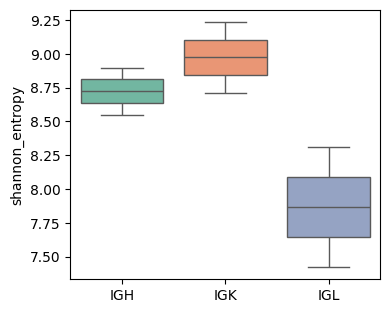

In [11]:
fig, ax = plt.subplots(1,1,figsize=(4, 3.5))
BAITS.VDJ.pl._boxplot(shannon_entropy_df, 'Cgene', 'shannon_entropy', groupby='Cgene', palette='Set2', xlabel=None, ylabel='shannon_entropy', log=False, ax=ax )
plt.show()


**Gini_index (based on UMIs)**

In [12]:

groups = [sample_col, Cgene_col]
gini_index_df = BAITS.VDJ.tl.compute_grouped_index(bcr_loc_df, sample_col, Cgene_col, clone_col, groups, count_basis = 'UMI', Umi_col='bcUmi', index='gini_index')
gini_index_df['tissue'] = gini_index_df['sample'].str.split('-').str[1]


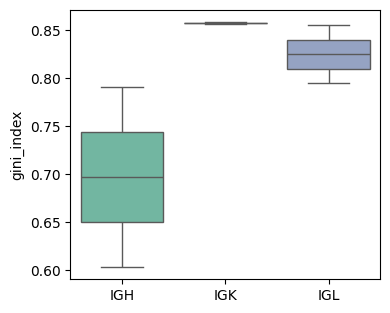

In [18]:

fig, ax = plt.subplots(1,1,figsize=(4, 3.5))
BAITS.VDJ.pl._boxplot(gini_index_df, 'Cgene', 'gini_index', groupby='Cgene', palette='Set2', xlabel=None, ylabel='gini_index', log=False, ax=ax )
plt.show()


**Renyi_entropy (based on UMIs)**

In [19]:
groups = [sample_col, Cgene_col]
renyi_entropy_df = BAITS.VDJ.tl.compute_grouped_index(bcr_loc_df, sample_col, Cgene_col, clone_col, groups, count_basis = 'UMI', Umi_col='bcUmi', index='renyi_entropy')
renyi_entropy_df['tissue'] = renyi_entropy_df['sample'].str.split('-').str[1]


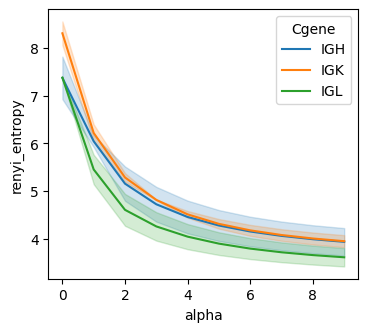

In [20]:
fig, ax = plt.subplots(1,1,figsize=(4, 3.5))
sns.lineplot(data=renyi_entropy_df, x="alpha", y="renyi_entropy", hue='Cgene', ax=ax )
plt.show()